In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import t
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = {
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Burglary': [10075, 9578, 7960, 6992, 6533, 6490, 6066, 6826, 5279, 5903],
    'Auto Related Thefts': [18810, 19098, 17860, 19428, 18980, 19571, 20024, 22026, 24878, 32808],
    'Theft from Person': [729, 657, 677, 576, 607, 525, 580, 335, 406, 555],
    'Retail Theft': [6825, 7322, 7290, 7622, 7745, 7397, 8814, 7740, 9371, 14255],
    'Family Unemployment': [0.209, 0.198, 0.187, 0.182, 0.176, 0.177, 0.168, 0.159, 0.165, 0.142],
    "Did not Receive SNAP - below poverty level": [0.1092, 0.0949, 0.0979, 0.1138, 0.0915, 0.1, 0.09148433, 0.094952905, 0.09708876, 0.08510182],
    'Poverty Status': [0.263, 0.26, 0.258, 0.257, 0.257, 0.245, 0.233, 0.231, 0.228, 0.217],
    "No Bachelor's Degree Over Age 25": [0.748, 0.74, 0.726, 0.714, 0.717, 0.691, 0.69, 0.688, 0.652, 0.637],
    'Uninsured Population': [0.149, 0.126, 0.097, 0.087, 0.071, 0.074, 0.081, 0.076, 0.072, 0.068],
}
df = pd.DataFrame(data)

for col in df.columns.drop('Year'):
    mean = np.mean(df[col])
    std_dev = np.std(df[col])
    df[col] = (df[col] - mean) / std_dev
    
print(df)  


   Year  Burglary  Auto Related Thefts  Theft from Person  Retail Theft  \
0  2013  1.946081            -0.594780           1.441594     -0.780346   
1  2014  1.613114            -0.527295           0.809854     -0.539920   
2  2015  0.529129            -0.817385           0.985338     -0.555400   
3  2016 -0.119386            -0.449969           0.099148     -0.394793   
4  2017 -0.426894            -0.554945           0.371147     -0.335291   
5  2018 -0.455702            -0.416460          -0.348334     -0.503638   
6  2019 -0.739763            -0.310313           0.134245      0.181844   
7  2020 -0.230598             0.158800          -2.015423     -0.337710   
8  2021 -1.267016             0.827086          -1.392458      0.451296   
9  2022 -0.848965             2.685260          -0.085109      2.813958   

   Family Unemployment  Did not Receive SNAP - below poverty level  \
0             1.783905                                    1.441669   
1             1.183814            


Burglary:
  Average RMSE: 0.5186
  Feature Importances:
    Family Unemployment: 0.1252
    Did not Receive SNAP - below poverty level: 0.0278
    Poverty Status: 0.0940
    No Bachelor's Degree Over Age 25: 0.4048
    Uninsured Population: 0.3482


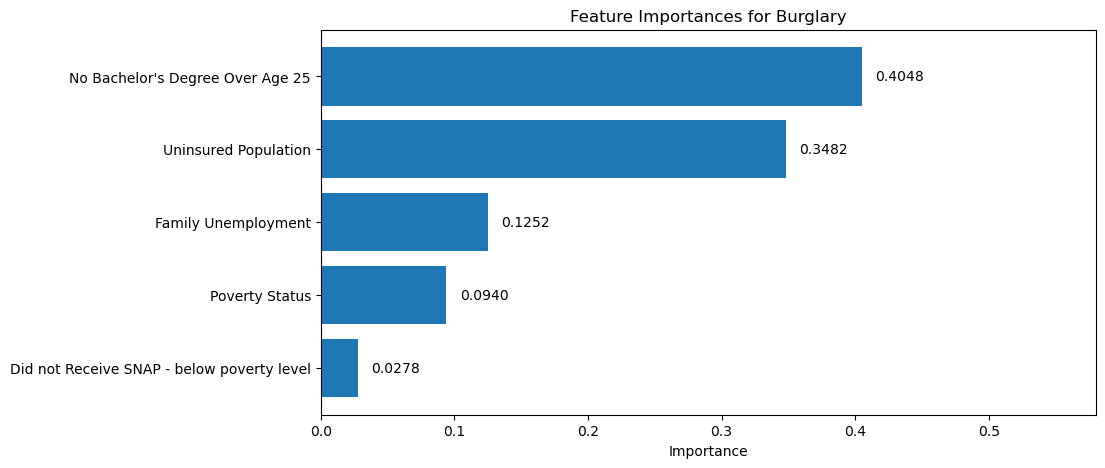

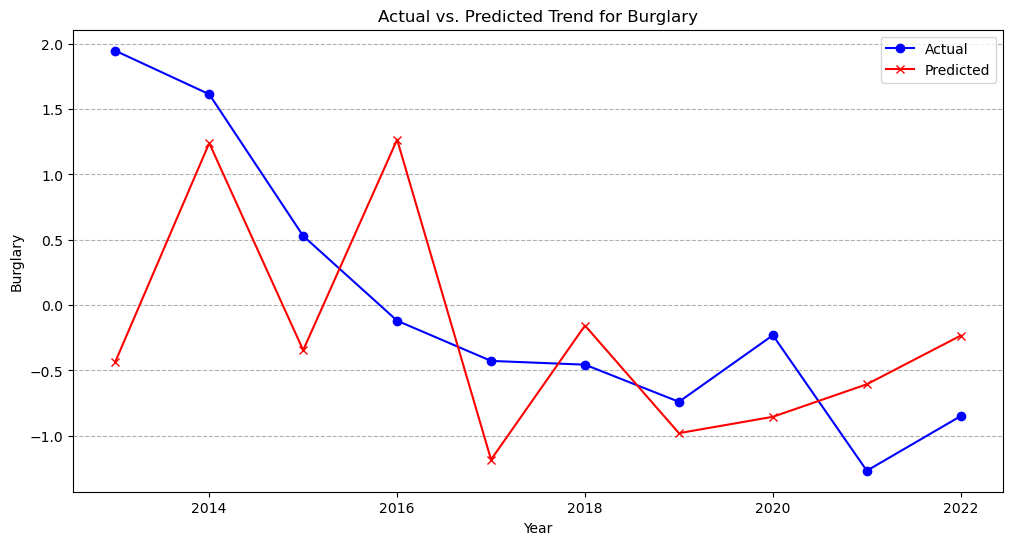


Auto Related Thefts:
  Average RMSE: 0.3943
  Feature Importances:
    Family Unemployment: 0.1361
    Did not Receive SNAP - below poverty level: 0.0722
    Poverty Status: 0.0917
    No Bachelor's Degree Over Age 25: 0.5103
    Uninsured Population: 0.1896


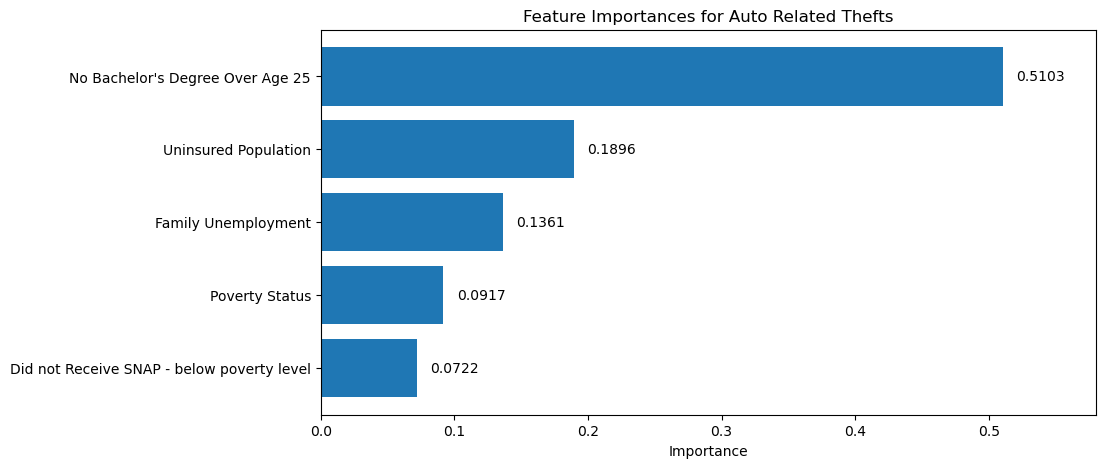

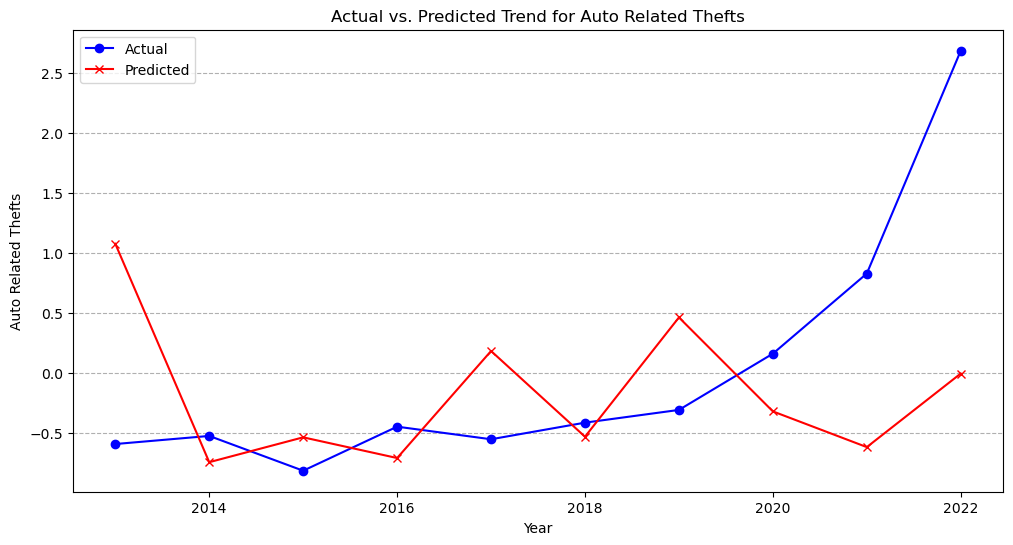


Theft from Person:
  Average RMSE: 0.8331
  Feature Importances:
    Family Unemployment: 0.1516
    Did not Receive SNAP - below poverty level: 0.0907
    Poverty Status: 0.1457
    No Bachelor's Degree Over Age 25: 0.4964
    Uninsured Population: 0.1157


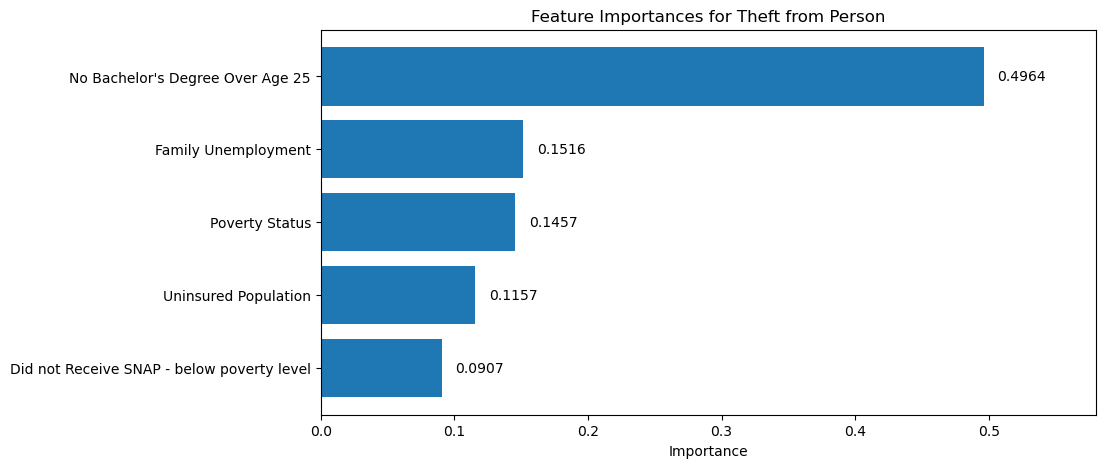

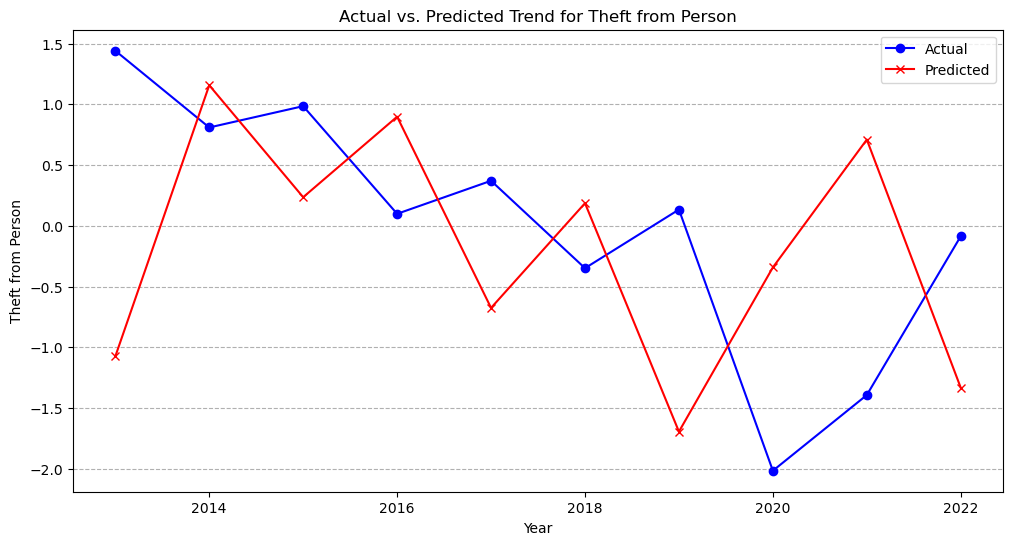


Retail Theft:
  Average RMSE: 0.5755
  Feature Importances:
    Family Unemployment: 0.1405
    Did not Receive SNAP - below poverty level: 0.0742
    Poverty Status: 0.0689
    No Bachelor's Degree Over Age 25: 0.5094
    Uninsured Population: 0.2070


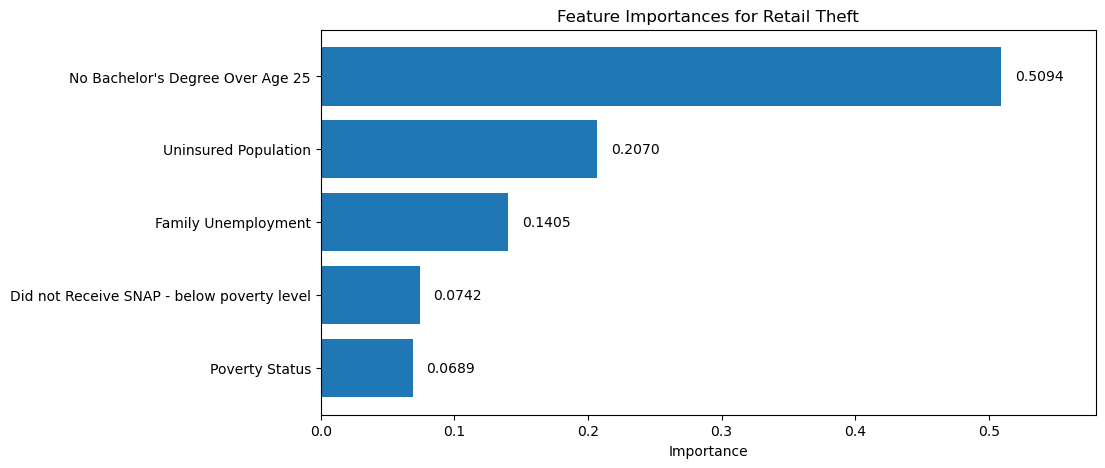

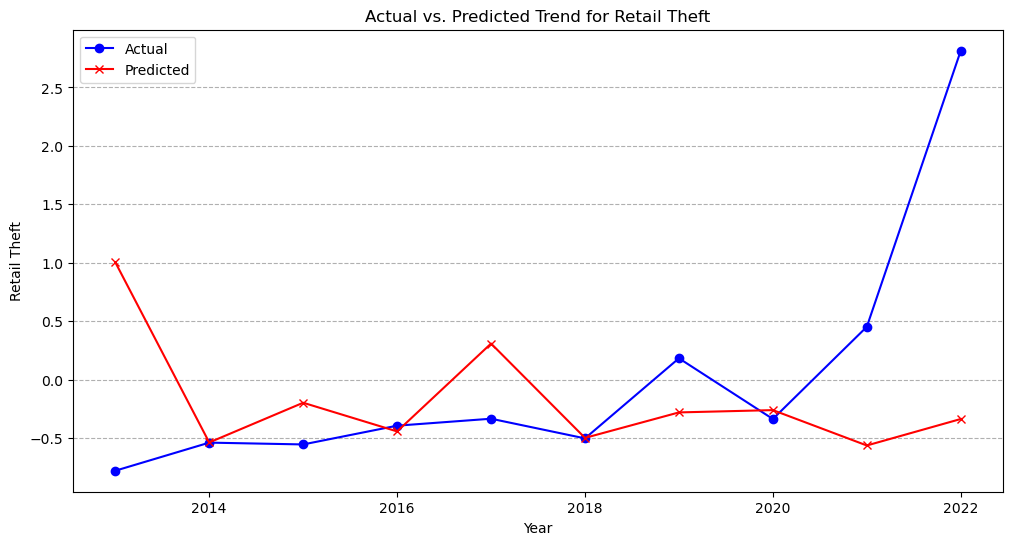

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import t
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#GBM

# Define Features and Target Variables
crime_columns = ['Burglary', 'Auto Related Thefts', 'Theft from Person', 'Retail Theft']
X = df.drop(columns=['Year'] + crime_columns)
y_columns = crime_columns

# K-Fold Cross-Validation Setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
results = {}

# Loop Through Each Crime Type
for crime in y_columns:
    y = df[crime]
    rmse_scores = []
    feature_importances = []
    all_predictions = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # GBM Model 
        gbm = GradientBoostingRegressor(random_state=42)
        gbm.fit(X_train, y_train)  
        predictions = gbm.predict(X_test)  
        all_predictions.extend(predictions)  
        # Calculate RMSE and store it
        mse = mean_squared_error(y_test, predictions)
        rmse_scores.append(mse**0.5)
        feature_importances.append(gbm.feature_importances_)
    avg_rmse = np.mean(rmse_scores)
    avg_feature_importances = np.mean(feature_importances, axis=0)
    results[crime] = {
        'Average RMSE': avg_rmse,
        'Feature Importances': avg_feature_importances
    }

    # Print Results for the Crime
    print(f"\n{crime}:")
    print(f"  Average RMSE: {results[crime]['Average RMSE']:.4f}")
    print(f"  Feature Importances:")
    for feature, importance in zip(X.columns, results[crime]['Feature Importances']):
        print(f"    {feature}: {importance:.4f}")

    # Plot Feature Importances
    importances = pd.DataFrame({'Feature': X.columns, 'Importance': avg_feature_importances})
    importances = importances.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 5))
    bars = plt.barh(importances['Feature'], importances['Importance'])
    plt.title(f'Feature Importances for {crime}')
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()  # Invert y-axis to show most important feature at the top

    for bar, importance in zip(bars, importances['Importance']):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{importance:.4f}', 
                 va='center', ha='left', fontsize=10)

    plt.xlim(0, .58)
    
    plt.show()
    
    
    years = df['Year']
    plt.figure(figsize=(12, 6))
    plt.plot(years, df[crime], marker='o', linestyle='-', color='blue', label='Actual')
    plt.plot(years, all_predictions, marker='x', linestyle='-', color='red', label='Predicted')
    plt.title(f'Actual vs. Predicted Trend for {crime}')
    plt.xlabel('Year')
    plt.ylabel(crime)
    plt.legend()
    plt.grid(axis='y', linestyle='--')
    plt.show()

In [4]:
import xgboost as xgb



Burglary:
  Average RMSE: 0.5088
  Feature Importances:
    Did not Receive SNAP - below poverty level: 0.0020
    Family Unemployment: 0.1063
    No Bachelor's Degree Over Age 25: 0.0000
    Poverty Status: 0.0093
    Uninsured Population: 0.0015


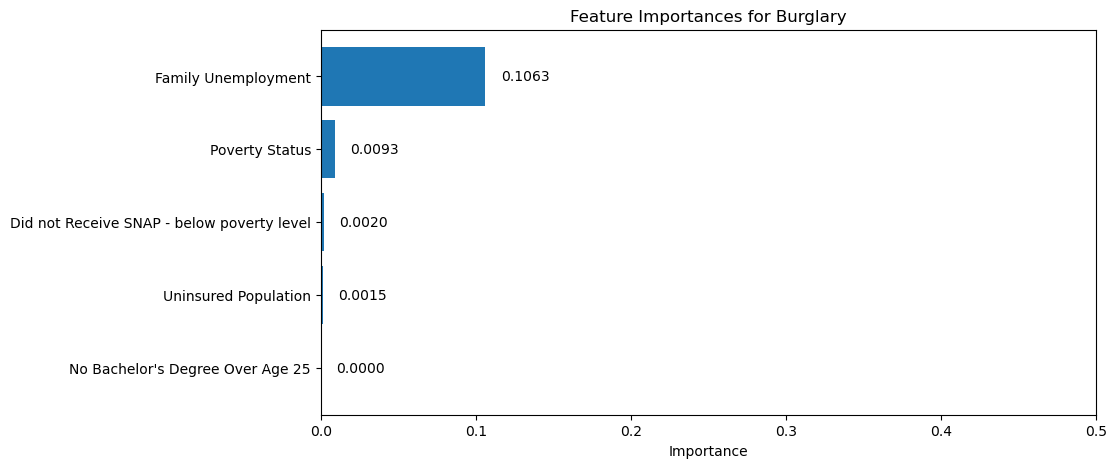

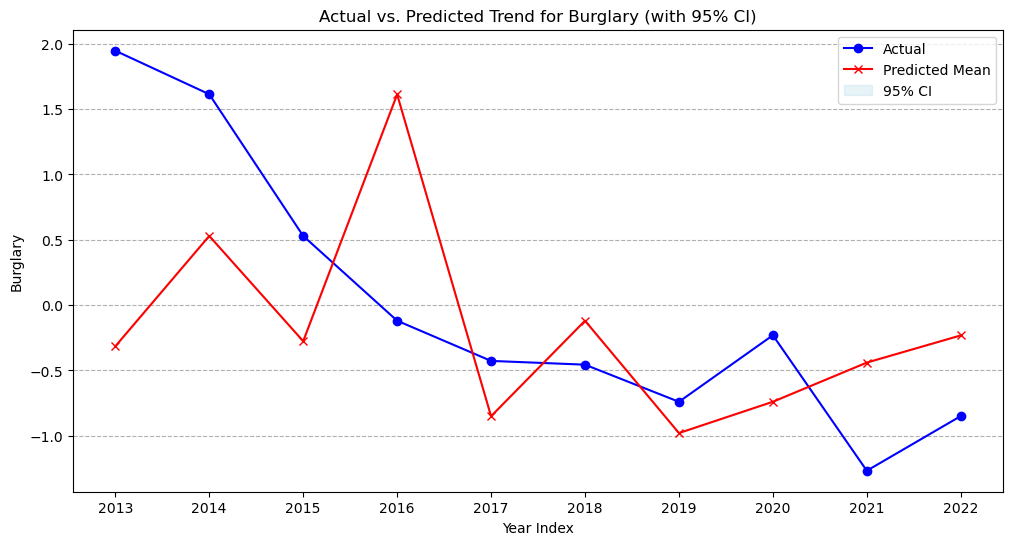


Auto Related Thefts:
  Average RMSE: 0.6933
  Feature Importances:
    Did not Receive SNAP - below poverty level: 0.0004
    Family Unemployment: 0.0465
    No Bachelor's Degree Over Age 25: 0.0025
    Poverty Status: 0.4301
    Uninsured Population: 0.0000


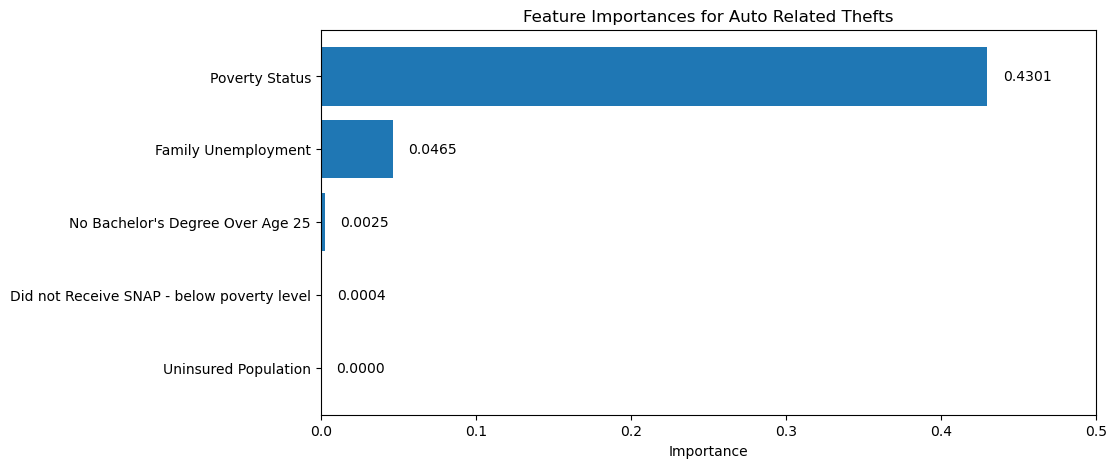

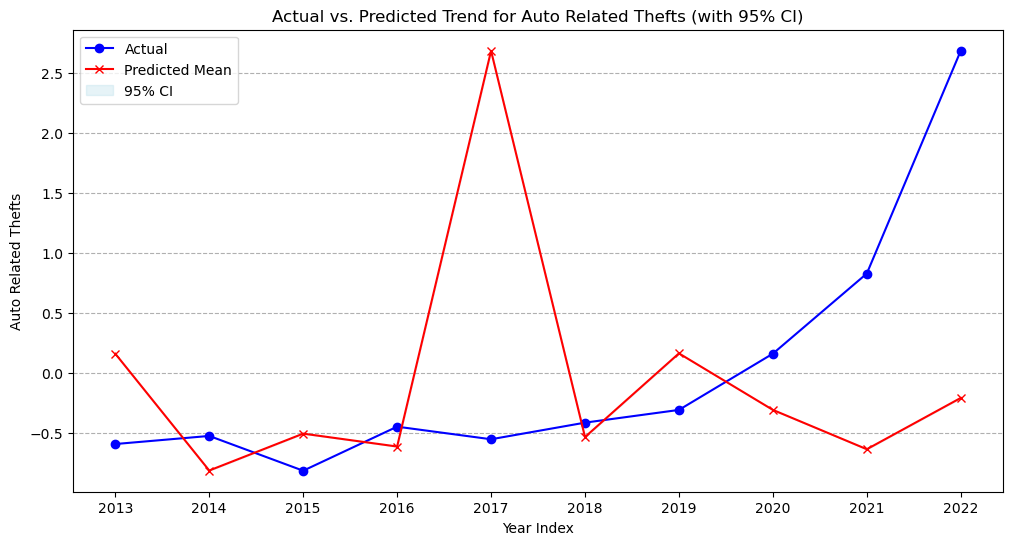


Theft from Person:
  Average RMSE: 0.9616
  Feature Importances:
    Did not Receive SNAP - below poverty level: 0.0145
    Family Unemployment: 0.0527
    No Bachelor's Degree Over Age 25: 0.2989
    Poverty Status: 0.1060
    Uninsured Population: 0.0981


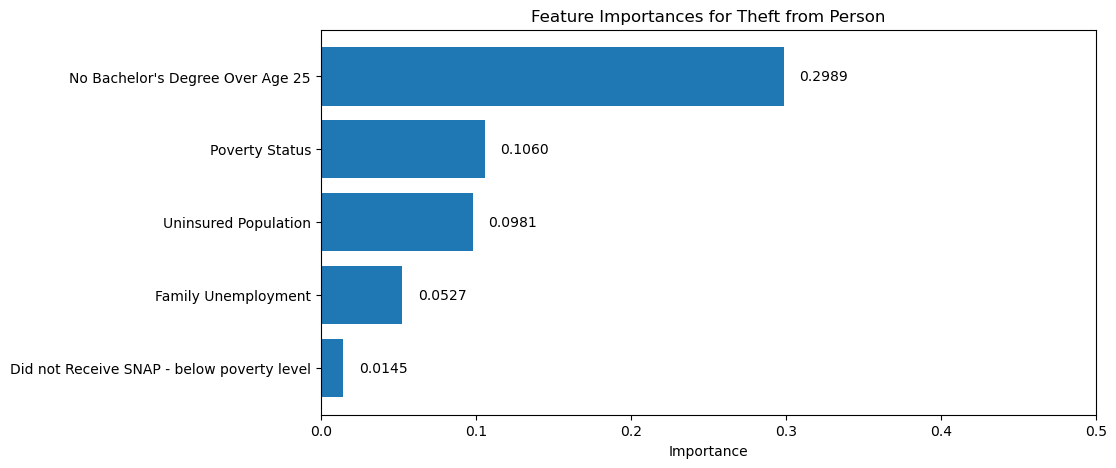

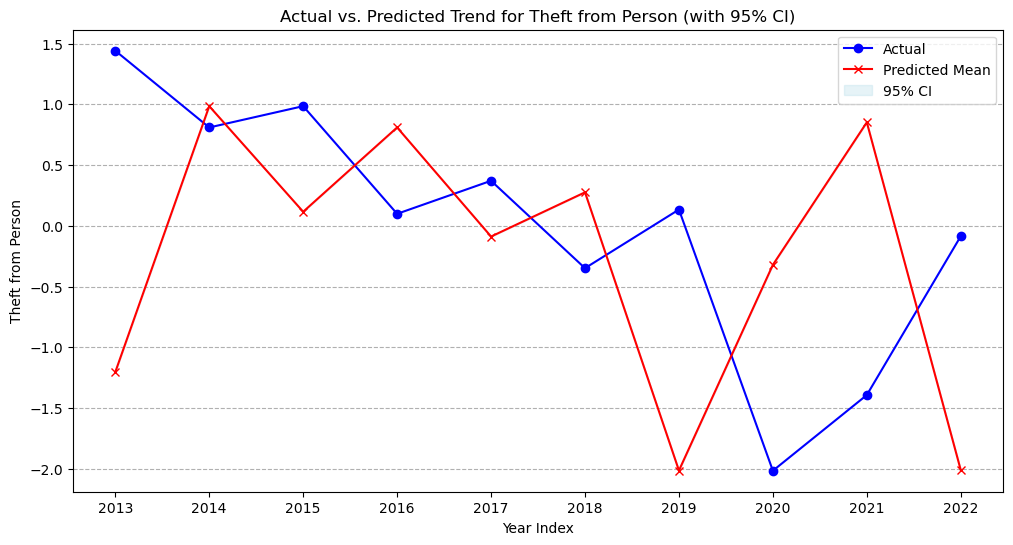


Retail Theft:
  Average RMSE: 0.8398
  Feature Importances:
    Did not Receive SNAP - below poverty level: 0.0060
    Family Unemployment: 0.1377
    Poverty Status: 0.0302
    Uninsured Population: 0.0000


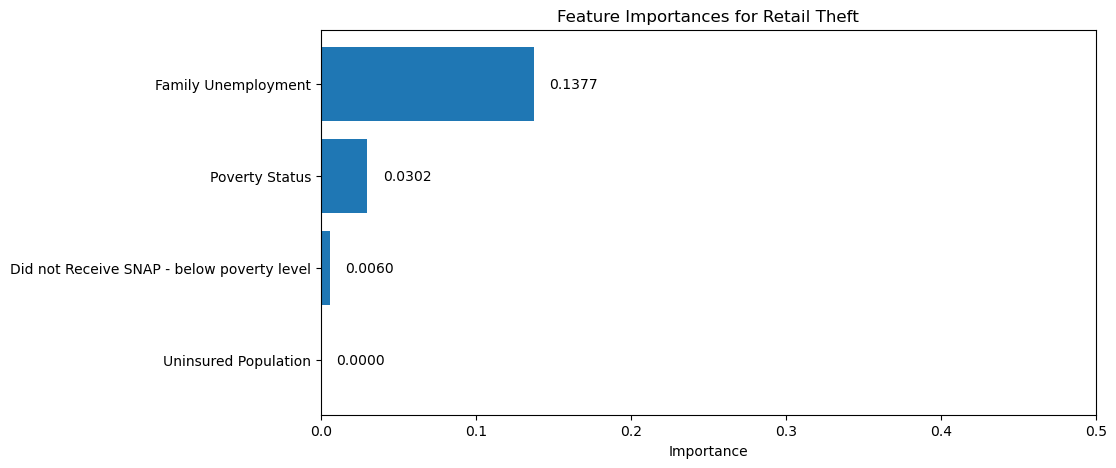

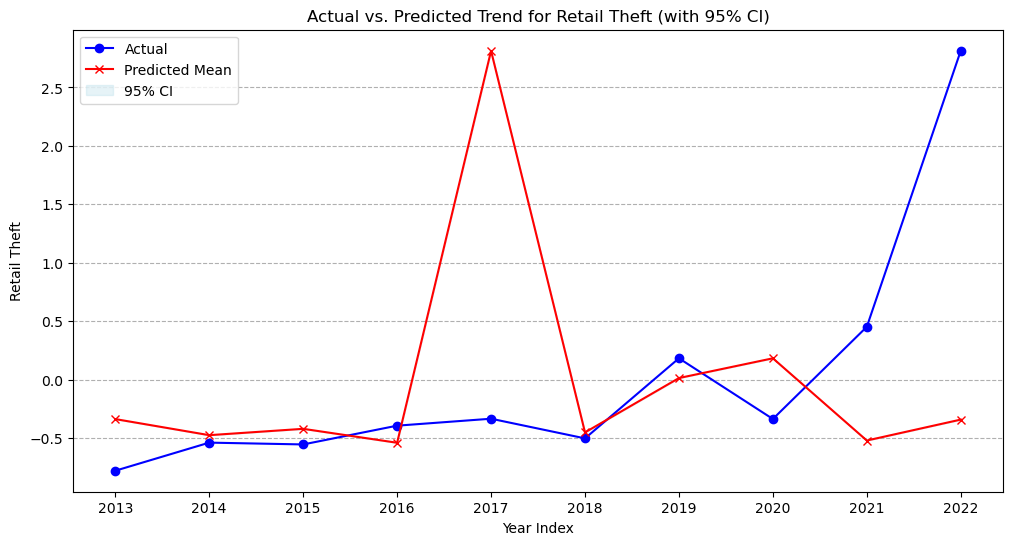

In [5]:
for crime in y_columns:
    y = df[crime]
    rmse_scores = []  # Change variable name to rmse_scores
    feature_importances = []
    all_predictions = []
    all_actuals = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        dtrain = xgb.DMatrix(X_train, label=y_train)
        dtest = xgb.DMatrix(X_test, label=y_test)
        params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'seed': 42
        }
        num_rounds = 100
        model = xgb.train(params, dtrain, num_rounds)
        predictions = model.predict(dtest)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))  # Calculate RMSE
        rmse_scores.append(rmse)  # Append RMSE to rmse_scores
        
        # Append feature importances (as a dictionary with 'gain' metric)
        feature_importances.append(model.get_score(importance_type='gain'))
        all_predictions.extend(predictions)
        all_actuals.extend(y_test)
    
    # Calculate average feature importances across folds
    feature_importance_list = []
    for fi in feature_importances:
        for feature, importance in fi.items():
            feature_importance_list.append({
                'Feature': feature,
                'Importance': importance
            })
    
    avg_feature_importances = pd.DataFrame(feature_importance_list).groupby('Feature').mean()
    
    results[crime] = {
        'Average RMSE': np.mean(rmse_scores),  # Update key to 'Average RMSE'
        'Feature Importances': avg_feature_importances['Importance'],  # Adjust to access importance values
        'Predictions': all_predictions,
        'Actuals': all_actuals
    }
    
    # Print results
    print(f"\n{crime}:")
    print(f"  Average RMSE: {results[crime]['Average RMSE']:.4f}")
    print(f"  Feature Importances:")
    for feature, importance in avg_feature_importances['Importance'].items():
        print(f"    {feature}: {importance:.4f}")
    
    importances = avg_feature_importances.reset_index().sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 5))
    bars = plt.barh(importances['Feature'], importances['Importance'])
    plt.title(f'Feature Importances for {crime}')
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()  # Invert y-axis to show most important feature at the top

    for bar, importance in zip(bars, importances['Importance']):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{importance:.4f}', 
                 va='center', ha='left', fontsize=10)
    plt.xlim(0, .5)
    plt.show()
    
    # Plot actual vs. predicted
    predictions_matrix = np.array(results[crime]['Predictions']).reshape(10, -1)
    years = np.arange(len(df))  # Create an array [0, 1, 2, ..., 9] for x-axis
    mean_predictions = predictions_matrix.mean(axis=1)
    std_err_mean_predictions = predictions_matrix.std(axis=1) / np.sqrt(predictions_matrix.shape[1])
    t_value = 2.262  # for 95% confidence interval
    ci_lower = mean_predictions - t_value * std_err_mean_predictions
    ci_upper = mean_predictions + t_value * std_err_mean_predictions
    
    plt.figure(figsize=(12, 6))
    plt.plot(years, df[crime], marker='o', linestyle='-', color='blue', label='Actual')
    plt.plot(years, mean_predictions, marker='x', linestyle='-', color='red', label='Predicted Mean')
    plt.fill_between(years, ci_lower, ci_upper, color='lightblue', alpha=0.3, label='95% CI')
    plt.title(f'Actual vs. Predicted Trend for {crime} (with 95% CI)')
    plt.xlabel('Year Index')
    plt.ylabel(crime)
    plt.xticks(years, data['Year'])  
    plt.legend()
    plt.grid(axis='y', linestyle='--')
    plt.show()
